# Lab 6
## Modeling a persistent plague: Malaria

In [1]:
#importing the required libraries

import numpy as np 
import math
import matplotlib.pyplot as plt

In [52]:
#uninfected humans 
def uninf_humans(hh,uh,p_vector):
    return alpha*hh - p_bite_human*p_vector*uh 

#human hosts
def human_hosts(uh,hh,p_vector):
    return p_bite_human*p_vector*uh - fat_rate*hh - alpha*hh - imm_rate*hh

#immune humans
def imm(hh):
    return imm_rate*hh

#vectors
def vector(uninf_mosq,v, p_hh):
    return p_bite_human*p_hh*uninf_mosq - mosq_death_rate*v 

#uninfected mosquitoes
def uninf_mos(tot_mosq, um):
    return mosq_birth_rate*tot_mosq - mosq_death_rate*um - p_bite_human*p_hh*um

#deaths due to malaria
def death(hh):
    return fat_rate*hh
    
#total mosquitoes
#def tot_mosq():
#    return tot_mosq + mosq_birth_rate*tot_mosq - mosq_death_rate*tot_mosq

In [56]:
N = 200 #time to run simulation
dt = 1


#initializing arrays to store compartment values

uninf_h = np.zeros(N)
hh = np.zeros(N)
immune = np.zeros(N)
vectors = np.zeros(N)
uninf_mosq = np.zeros(N)
deaths = np.zeros(N)


#defining constants


alpha = 0.3 #recovery rate 
imm_rate = 0.01 #probability that human host gets immune
fat_rate = 0.005 #fatality rate of malaria
mosq_birth_rate = 0.01 #birth rate of mosquitoes
mosq_death_rate = 0.01 
p_bite_human = 0.3 #probability that an uninfected mosquito bites a human 
#p_hh = 0.3 #probability that the host it bit is a human host 

#defining initial values 

uninf_h[0] = 300
hh[0] = 1
uninf_mosq[0] = 300
vectors[0] = 0

In [57]:
for i in range(1,N):
    #probability that a mosquito is a vector
    p_vector = vectors[i-1]/(vectors[i-1]+uninf_mosq[i-1])
    p_hh = hh[i-1]/(hh[i-1]+immune[i-1]+uninf_h[i-1])
    
    uninf_h[i] = uninf_h[i-1] + uninf_humans(hh[i-1],uninf_h[i-1],p_vector)*dt
    hh[i] = hh[i-1] + human_hosts(uninf_h[i-1],hh[i-1], p_vector)*dt
    immune[i] = immune[i-1] + imm(hh[i-1])*dt
    vectors[i] = vectors[i-1] + vector(uninf_mosq[i-1],vectors[i-1], p_hh)*dt
    uninf_mosq[i] = uninf_mosq[i-1] + uninf_mos((vectors[i-1]+uninf_mosq[i-1]), uninf_mosq[i-1])*dt
    deaths[i] = deaths[i-1] + death(hh[i-1])*dt

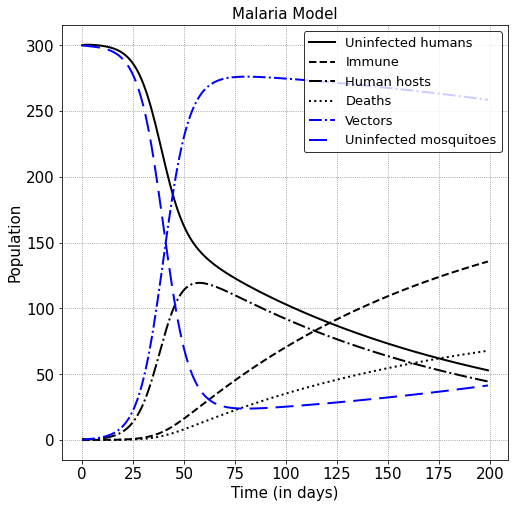

In [58]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,N,int(1/dt))

#plots
plt.plot(uninf_h, label='Uninfected humans', ls='-',lw=2, color='k')
plt.plot(immune, label='Immune',ls='--',lw=2, color='k')
plt.plot(hh, label='Human hosts',ls='-.',lw=2, color='k')
plt.plot(deaths, label='Deaths',ls=':',lw=2, color='k')
plt.plot(vectors, label='Vectors',ls='-.',lw=2, color='b')
plt.plot(uninf_mosq, label='Uninfected mosquitoes',ls=(0, (9, 4)),lw=2, color='b')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('Malaria Model', fontsize=15, color='k')
plt.legend(fontsize=13, loc='upper right', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# Fumigation effects

In [ ]:
#uninfected humans 
def uninf_humans(hh,uh,p_vector):
    return alpha*hh - p_bite_human*p_vector*uh 

#human hosts
def human_hosts(uh,hh,p_vector):
    return p_bite_human*p_vector*uh - fat_rate*hh - alpha*hh - imm_rate*hh

#immune humans
def imm(hh):
    return imm_rate*hh

#vectors
def vector(uninf_mosq,v, p_hh):
    return p_bite_human*p_hh*uninf_mosq - mosq_death_rate*v 

#uninfected mosquitoes
def uninf_mos(tot_mosq, um):
    return mosq_birth_rate*tot_mosq - mosq_death_rate*um - p_bite_human*p_hh*um

#deaths due to malaria
def death(hh):
    return fat_rate*hh
    
#total mosquitoes
#def tot_mosq():
#    return tot_mosq + mosq_birth_rate*tot_mosq - mosq_death_rate*tot_mosq